<a href="https://colab.research.google.com/github/LuanFaria/LuanFaria/blob/main/PREVISAO%20DE%20SAFRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Nova seção

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#IMPORTANDO BASE DE DADOS
bd_agro = pd.read_csv('/content/drive/MyDrive/agricultural_yield_train.csv')
bd_agro
#display(bd_agro)

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665
...,...,...,...,...,...,...,...
15995,77.053550,1,154.189768,103.115855,319.915079,7,956.781949
15996,99.795631,1,282.295839,123.598354,647.292136,4,879.682714
15997,67.478487,1,120.017122,102.308627,514.372747,8,932.829561
15998,85.176890,1,247.847389,114.956634,695.035801,6,889.738438


In [24]:
bd_agro.isna().sum()

Soil_Quality                        0
Seed_Variety                        0
Fertilizer_Amount_kg_per_hectare    0
Sunny_Days                          0
Rainfall_mm                         0
Irrigation_Schedule                 0
Yield_kg_per_hectare                0
dtype: int64

In [25]:
bd_agro.info(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      16000 non-null  float64
 1   Seed_Variety                      16000 non-null  int64  
 2   Fertilizer_Amount_kg_per_hectare  16000 non-null  float64
 3   Sunny_Days                        16000 non-null  float64
 4   Rainfall_mm                       16000 non-null  float64
 5   Irrigation_Schedule               16000 non-null  int64  
 6   Yield_kg_per_hectare              16000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 875.1 KB


In [27]:
#TRATAMENTO DE IBNFORMAÇÕES VAZIAS e caracteres especiais - caso fosse preciso
valores_vazios=['-', '',' ','_','*']
bd_agro = pd.read_csv('/content/drive/MyDrive/agricultural_yield_train.csv', na_values=valores_vazios)


In [28]:
bd_agro['Yield_kg_per_hectare'] = bd_agro['Yield_kg_per_hectare'].fillna(0)
bd_agro['Yield_kg_per_hectare']

0        683.759119
1        678.714861
2        934.691975
3        905.842541
4        897.584665
            ...    
15995    956.781949
15996    879.682714
15997    932.829561
15998    889.738438
15999    554.698389
Name: Yield_kg_per_hectare, Length: 16000, dtype: float64

<Axes: >

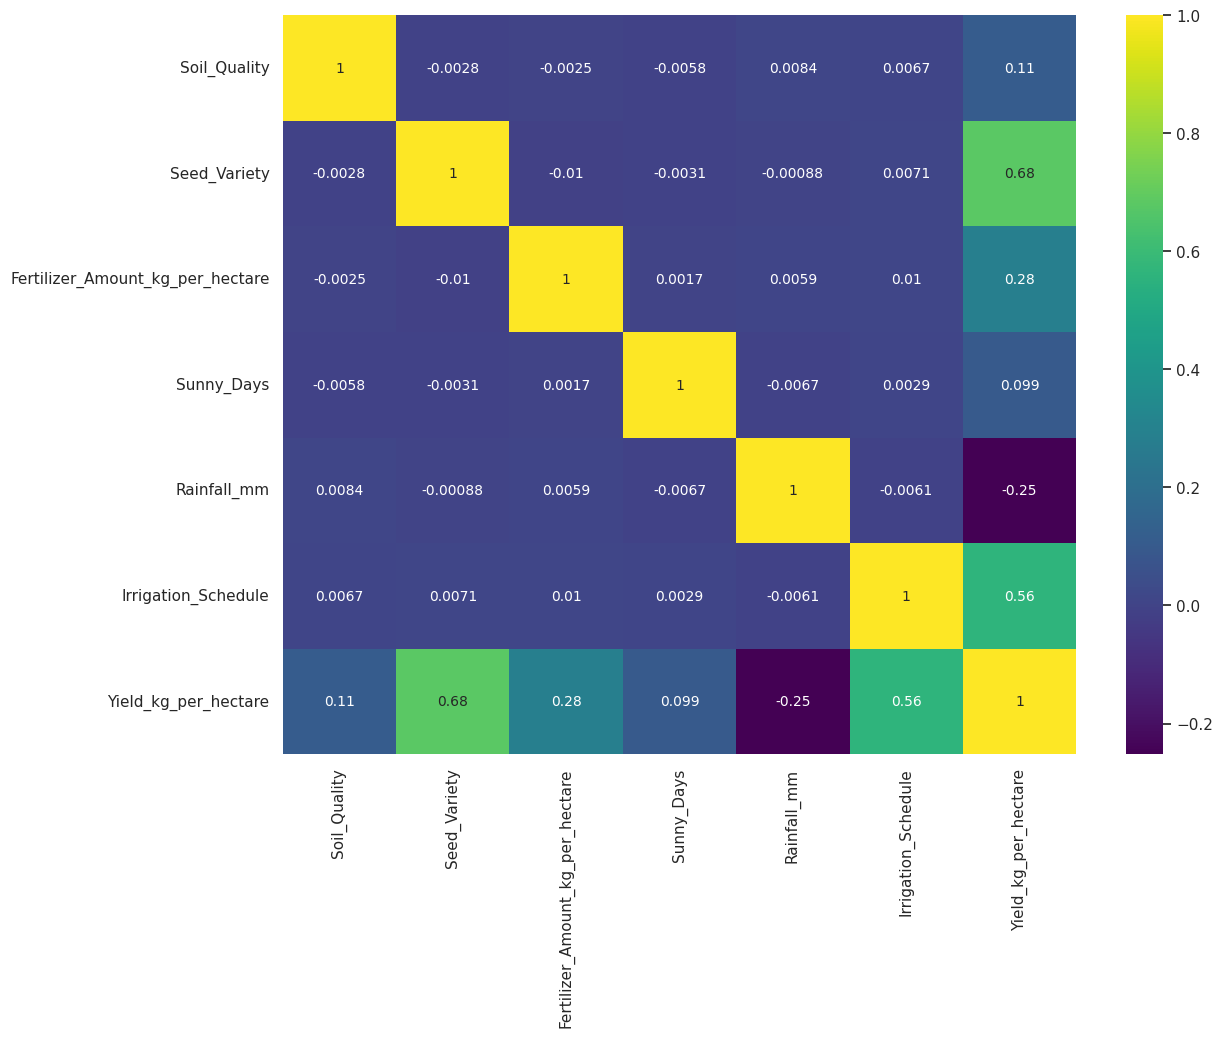

In [30]:
#Matriz de correlação
fig = pl.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize *2)
sb.set(font_scale=1)
sb.heatmap(bd_agro.corr(), annot=True,  annot_kws={"size":10 }, cmap="viridis")

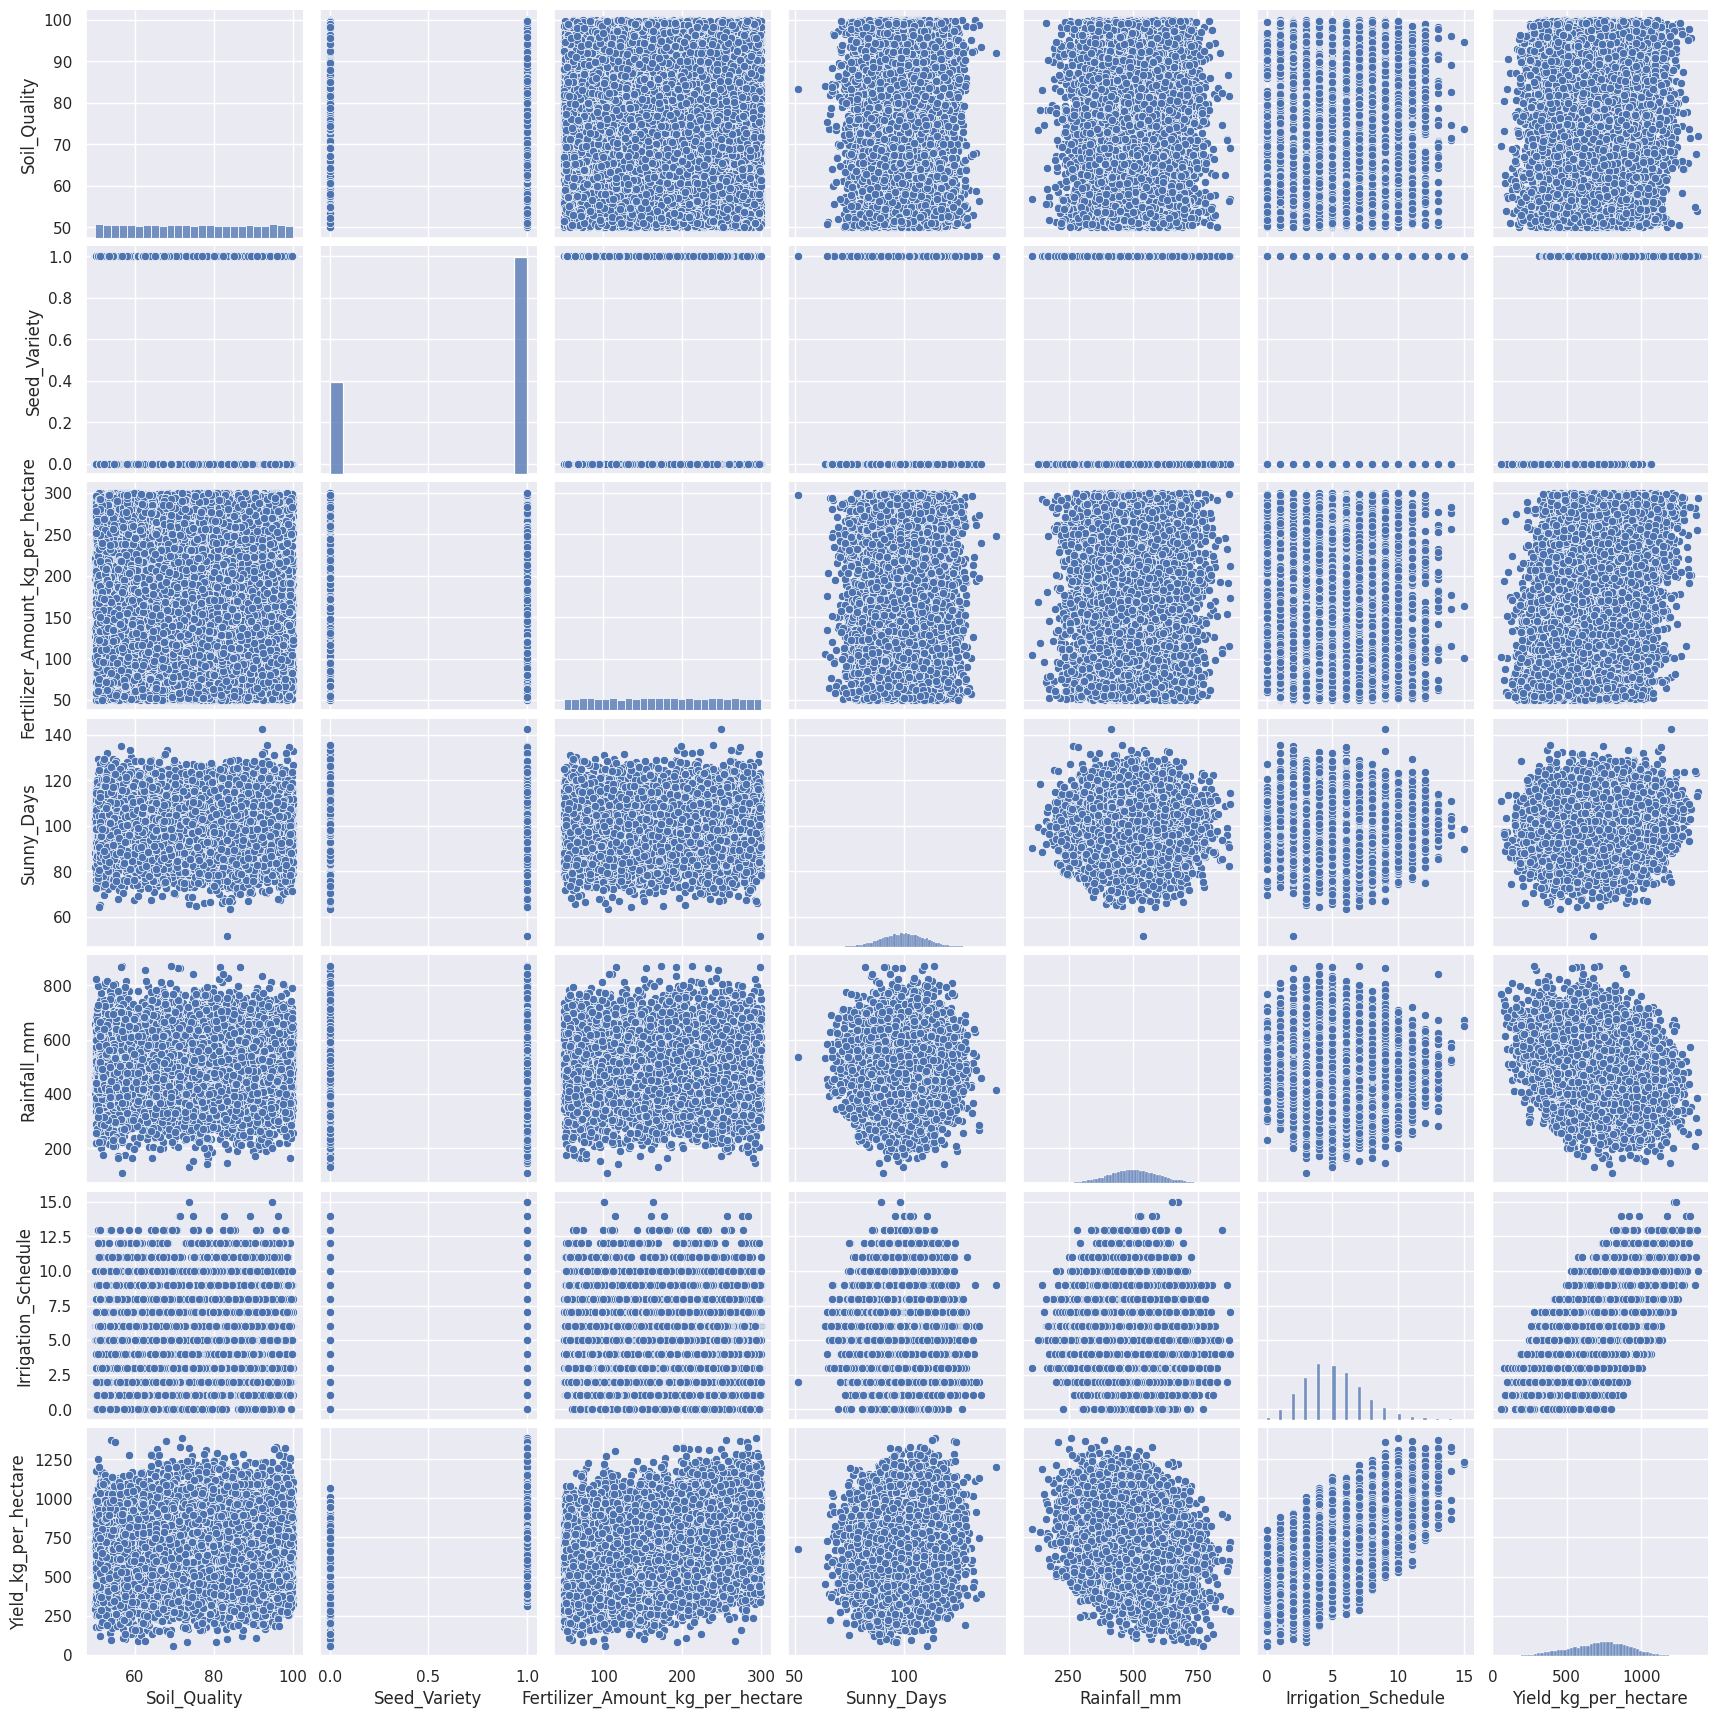

In [31]:
sb.pairplot(bd_agro)
pl.show()


In [ ]:
#kmeans.labels_

In [ ]:
#analise5['classes'] = kmeans.labels_
#analise5.head(10)

In [ ]:
#Estatistica descritiva basica
#descritiva=info.describe()
#descritiva.head(10)

In [ ]:
#Estatistica descritiva completa
#mediana = info.median()
#variancia = info.var()
#media = info.mean()
#DV= info.std()
#Assimetria =info.skew()
##curtose = info.kurtosis()
#CV= (DV/media)*100
#Minimo= info.min()
#Maximo= info.max()

#df = pd.DataFrame(zip(descritiva, mediana, variancia, media, DV, Assimetria, curtose, CV, Minimo, Maximo), columns=['Descritiva', 'mediana', 'variancia', 'media' ,'DV', 'Assimetria', 'curtose', 'CV', 'Minimo', 'Maximo'])
#df.head(50)

In [39]:
x = bd_agro.drop('Yield_kg_per_hectare', axis=1)
y = bd_agro['Yield_kg_per_hectare']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=1)

In [40]:
# treino AI
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

R² da Regressão Linear: 0.9402620508532151
MSE da Regressão Linear: 2462.6083695875086
R² do Random Forest: 0.9265847779448318
MSE do Random Forest: 3026.4336635318355


<Axes: >

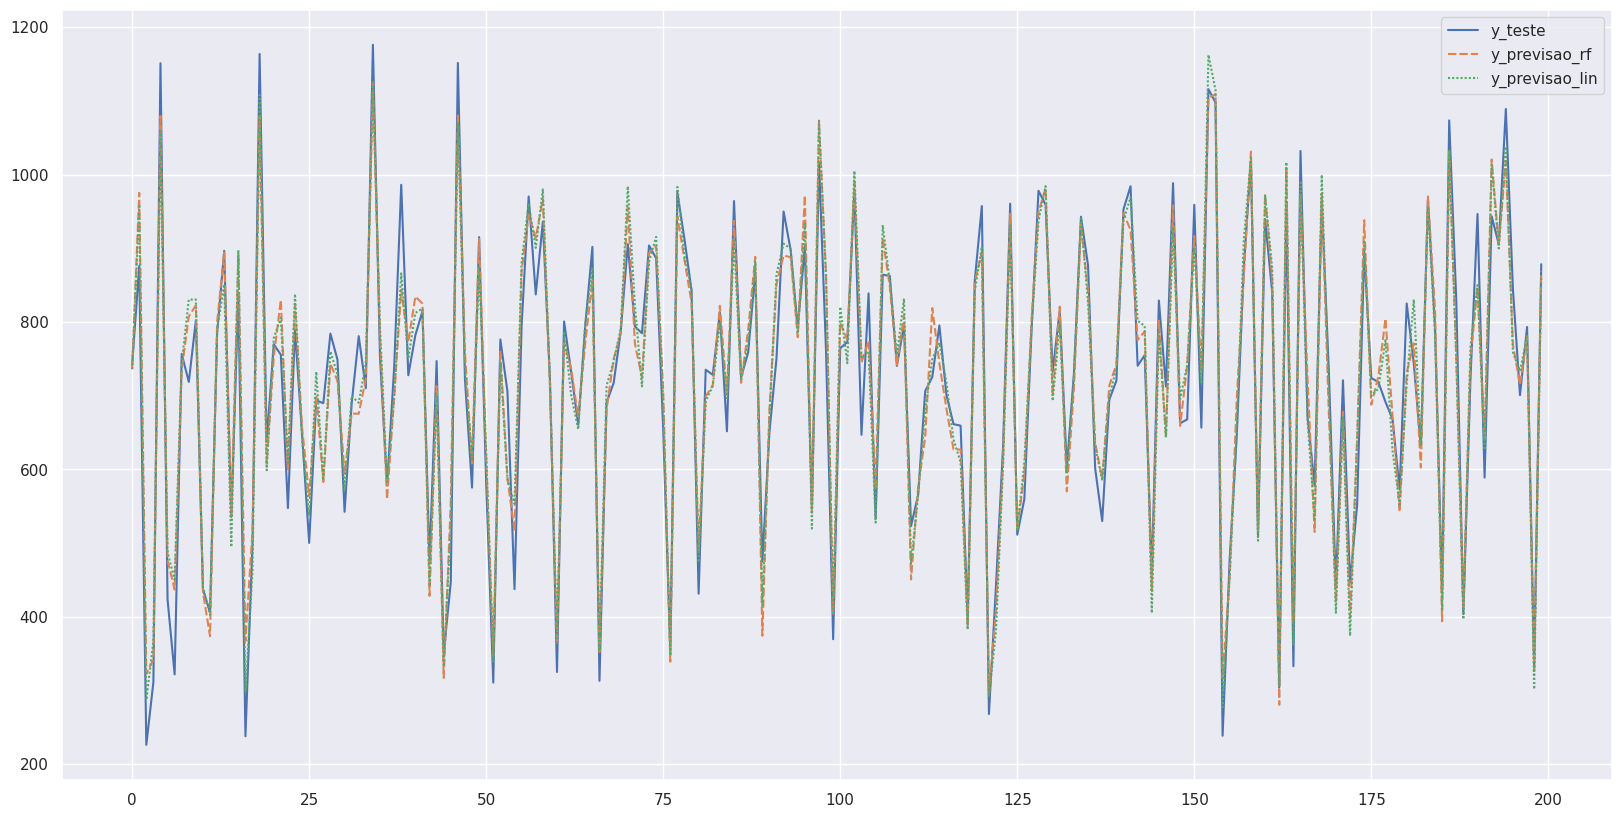

In [66]:
df_resultado = pd.DataFrame()

# df_resultado.index = x_test
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin

# display(df_resultado)
df_resultado = df_resultado.reset_index(drop=True)
pl.figure(figsize=(20, 10))
sb.lineplot(data=df_resultado.head(200))


In [67]:
pl.show()
display(df_resultado.head(20))

,y_teste,y_previsao_rf,y_previsao_lin
0,741.654357,736.318440,735.928338
1,876.162462,975.403010,957.404835
2,226.431569,322.785456,287.539898
3,311.478464,342.081559,366.818029
4,1151.198929,1079.711109,1059.281083
5,423.580073,476.522876,487.531983
6,321.970623,437.123959,450.550179
7,756.873592,735.503075,744.183192
8,718.766352,807.700619,830.460154
9,802.222771,822.591664,830.661698


In [68]:
pl.show()
display(df_resultado)

,y_teste,y_previsao_rf,y_previsao_lin
0,741.654357,736.318440,735.928338
1,876.162462,975.403010,957.404835
2,226.431569,322.785456,287.539898
3,311.478464,342.081559,366.818029
4,1151.198929,1079.711109,1059.281083
...,...,...,...
4795,660.711863,638.000119,646.752479
4796,512.305546,516.678437,495.517919
4797,911.481441,867.046031,844.510664
4798,376.737309,437.210234,448.637077


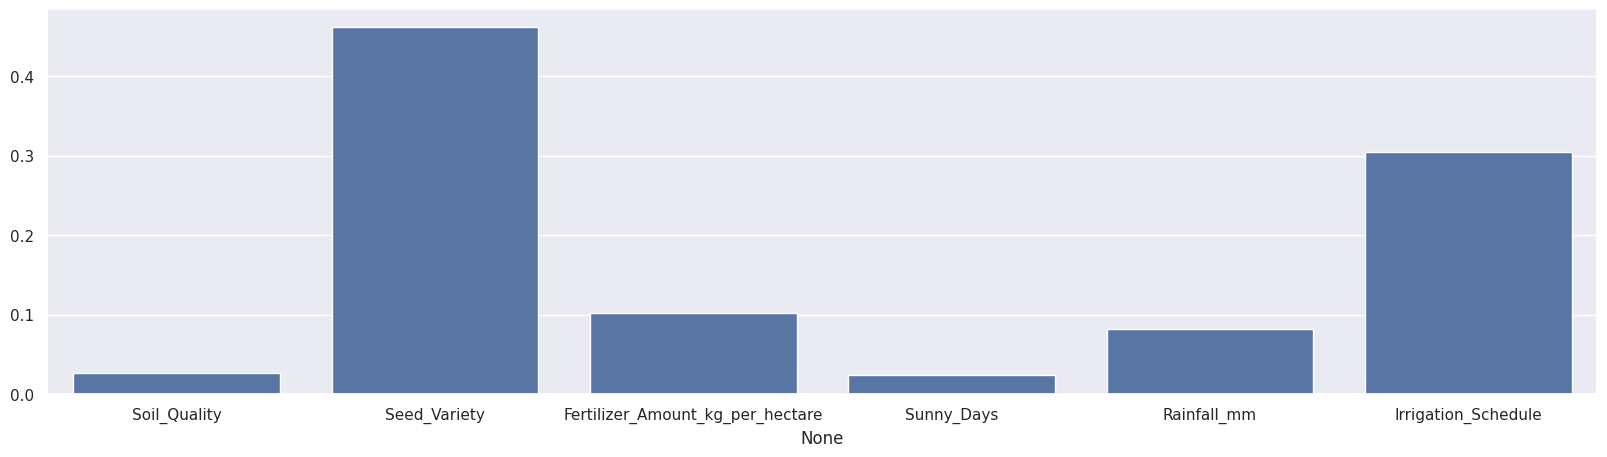

In [79]:
pl.figure(figsize=(20,5))
sb.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
pl.show()

In [80]:
rf_reg.feature_importances_

array([0.02672813, 0.4612034 , 0.1015701 , 0.02453969, 0.0812536 ,
       0.30470509])